In [1]:
import numpy as np
import struct
import os

In [2]:
path = '/Users/precious/Desktop/Machine Learning/Neural Network(easy)/data'
kind = 'train'

labels_path = os.path.join(path,'%s-labels.idx1-ubyte'% kind)
images_path = os.path.join(path,'%s-images.idx3-ubyte'% kind)
with open(labels_path, 'rb') as lbpath:
    magic, n = struct.unpack('>II',lbpath.read(8))
    train_labels = np.fromfile(lbpath,dtype=np.uint8)
with open(images_path, 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
    train_images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(train_labels), 784)

kind = 't10k'

labels_path = os.path.join(path,'%s-labels.idx1-ubyte'% kind)
images_path = os.path.join(path,'%s-images.idx3-ubyte'% kind)
with open(labels_path, 'rb') as lbpath:
    magic, n = struct.unpack('>II',lbpath.read(8))
    test_labels = np.fromfile(lbpath,dtype=np.uint8)
with open(images_path, 'rb') as imgpath:
    magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
    test_images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(test_labels), 784)  

plot figure

In [3]:
import matplotlib.pyplot as plt

def plot_img(img_data, img_label, count, rows=1, cols=0):
    if not cols:
        cols = int(count / rows)
    fig=plt.figure(figsize=(8,8))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
    for i in range(count):
        images = np.reshape(img_data[i], [28,28])
        ax=fig.add_subplot(rows,cols,i+1,xticks=[],yticks=[])
        ax.imshow(images,cmap=plt.cm.binary,interpolation='nearest')
        ax.text(0,7,str(img_label[i]))
    plt.show()

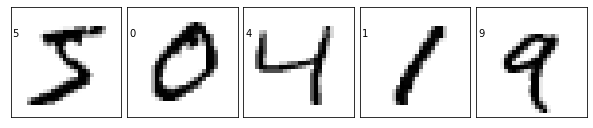

In [4]:
plot_img(train_images, train_labels, 5)

In [5]:
import torch

dev = 'mps'

In [6]:
train_images = (np.asfarray(train_images) / 255.0 * 0.99) + 0.01
test_images = (np.asfarray(test_images) / 255.0 * 0.99) + 0.01

In [7]:
train_tensor = torch.tensor(train_images, dtype=torch.float)
test_tensor = torch.tensor(test_images, dtype=torch.float)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.int64)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.int64)

In [8]:
train_labels_tensor = torch.nn.functional.one_hot(train_labels_tensor, num_classes=10).float()
test_labels_tensor = torch.nn.functional.one_hot(test_labels_tensor, num_classes=10).float()

In [9]:
from torch.utils import data

def make_iters(tensor, labels, batch_size, num_workers=8):
    set = data.TensorDataset(tensor, labels)
    iter = data.DataLoader(set, batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    return iter

In [10]:
batch_size = 1000

# train_tensor = train_tensor[:100]
# train_labels_tensor = train_labels_tensor[:100]
# test_tensor = test_tensor[:10]
# test_labels_tensor = test_labels_tensor[:10]

train_iter = make_iters(train_tensor, train_labels_tensor, batch_size)
test_iter = make_iters(test_tensor, test_labels_tensor, batch_size)

In [11]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 28)
        self.fc2 = nn.Linear(28, 10)
        self.predict = nn.Linear(10,10)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(F.softmax(x, dim=0))
        x = F.softmax(x, dim = 0)
        return self.predict(x)

net = Net().to(dev)

In [12]:
class Net(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = nn.Linear(n_input,n_hidden)
        self.hidden2 = nn.Linear(n_hidden,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    def forward(self,input):
        out = self.hidden1(input)
        out = F.relu(out)
        out = self.hidden2(out)
        out = torch.sigmoid(out)
        out = self.predict(out)
        # out = F.softmax(out, dim=0)

        return out


net = Net(28*28, 28, 10).to(dev)


In [13]:
input = torch.tensor(range(28*28),dtype=torch.float).to(dev)
out = net(input)
print(out)

/Users/precious/opt/anaconda3/envs/pytorch/lib/python3.10/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::masked_select' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1664349113260/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(


tensor([ 0.4572, -0.1678, -0.0633,  0.1338,  0.3533, -0.1876, -0.0693, -0.2402,
         0.5396, -0.2506], device='mps:0', grad_fn=<LinearBackward0>)


In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1
                    #   , momentum=0.9
                      )

In [15]:
# def accuracy(y_hat, y):
#     """Calculate the number of the right samples"""
#     if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
#         y_hat = y_hat.argmax(axis=0)
#     cmp = y_hat.type(y.dtype) == y
#     return float(cmp.type(y.dtype).sum())

In [16]:
# class Accumulator:
#     """Summing over n variables"""
#     def __init__(self, n):
#         self.data = [0.0] * n

#     def add(self, *args):
#         self.data = [a + float(b) for a, b in zip(self.data, args)]
    
#     def reset(self):
#         self.data = [0.0] * len(self.data)

#     def __getitem__(self, idx):
#         return self.data[idx]

In [17]:
# def evaluate_accuracy(net, data_iter):
#     """Computes the precision of the model on the specified dataset."""
#     if isinstance(net, torch.nn.Module):
#         net.eval()   # evaluation models
#     metric = Accumulator(2)
#     for X, y in data_iter:
#         metric.add(accuracy(net(X.to(dev)), y.to(dev)), y.numel())
#     return metric[0] / metric[1]
def evaluate_accuracy(net, data, data_labels):
    temp = net(data)
    temp = torch.max(temp, dim=1).indices
    return ((temp.eq(torch.max(data_labels, dim=1).indices)==True).sum() / len(data)).item()

evaluate_accuracy(net, train_tensor.to(dev), train_labels_tensor.to(dev))

0.09736666828393936

In [18]:
num_epochs = 25

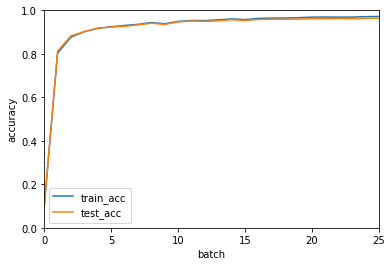

In [19]:
from numpy import append
from IPython import display


train_acc = evaluate_accuracy(net, train_tensor.to(dev), train_labels_tensor.to(dev))
test_acc = evaluate_accuracy(net, test_tensor.to(dev), test_labels_tensor.to(dev))
i = 0

y = np.array([[train_acc, test_acc]])
for epoch in range(num_epochs):
    running_loss = 0.0
    # i = 0
    for  batch_datas, batch_labels in train_iter:
        i += batch_size
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(batch_datas.to(dev))
        loss = criterion(outputs, batch_labels.to(dev))
        # accumulation_steps = 10
        # loss = loss / accumulation_steps                # Normalize our loss (if averaged)
        # loss.backward()                                 # Backward pass
        # if (i+1) % accumulation_steps == 0:             # Wait for several backward steps
        #     optimizer.step()                            # Now we can do an optimizer step
        #     net.zero_grad()                             # Reset gradients tensors
        #     if (i+1) % evaluation_steps == 0:           # Evaluate the model when we...
        #         criterion()                             # ...have no gradients accumulated
        loss.backward()
        optimizer.step()

        # print statistics
        # running_loss += loss.item()
        # if i % 30000 == 1:    # print every 2000 mini-batches
        #     print('[%d, %5d] loss: %.3f' %
        #           (epoch + 1, i + 1, running_loss / (2000/batch_size)))
        #     running_loss = 0.0
        # running_loss = loss.item()
    
    train_acc = evaluate_accuracy(net, train_tensor.to(dev), train_labels_tensor.to(dev))
    test_acc = evaluate_accuracy(net, test_tensor.to(dev), test_labels_tensor.to(dev))
    y = np.insert(y, len(y), np.array([train_acc, test_acc]), axis=0)	# 添加i的平方到y轴的数据中

    # print('train_accuracy={}'.format(evaluate_accuracy(net, train_iter)))
    print('test_accuracy={}'.format(test_acc))
    display.clear_output(wait=True)
    # print(y.shape)
    plt.plot(range(epoch+2), y[:,0], label='train_acc')
    plt.plot(range(epoch+2), y[:,1], label='test_acc')
    # plt.plot(y[:,2], label='loss')

    # plt.ylabel('accuracy')
    plt.ylim([0,1])
    plt.xlim([0, num_epochs])
    plt.xlabel('batch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    plt.pause(0.1)  # 暂停一段时间，不然画的太快会卡住显示不出来
    
    # print('train_accuracy={}'.format(evaluate_accuracy(net, train_iter)))
    # print('test_accuracy={}'.format(evaluate_accuracy(net, test_iter)))
    # animator.add(i + 1, train_metrics + (test_acc,))

# train_loss, train_acc = train_metrics

# plt.plot(accuracy_list)
# plt.ylabel('accuracy')
# plt.xlabel('epoch')

In [20]:
# net(test_tensor.to(dev)).max(dim=1).indices.eq(torch.tensor(test_labels).to(dev))
evaluate_accuracy(net, test_tensor.to(dev), test_labels_tensor.to(dev))

0.9641000032424927

In [21]:
from PIL import Image


In [22]:
def pre_pic(picName):
    #打开传入的原始图片
    img = Image.open(picName)
    #为符合要求，把图片resize成28*28，用消除锯齿的方法
    relm = img.resize((28, 28), Image.Resampling.LANCZOS)

    #变成灰度图并转换为矩阵形式

    im_arr = np.array(relm.convert("L"))
    threshold = 110

    #给图片反色，因为要求输入黑底白字，输入的是白底黑字，并进行二值化处理
    for i in range(28):
        for j in range(28):
            im_arr[i][j]= 255-im_arr[i][j]
            if(im_arr[i][j]<threshold):
                im_arr[i][j] = 0
            else:im_arr[i][j] = 255

    nm_arr = im_arr.reshape([1, 784])
    nm_arr = nm_arr.astype(np.float32)
    img_ready = np.multiply(nm_arr, 1.0/255.0)
    return img_ready

In [23]:
pic_path = 'mydata/'
pic_list = []

for i in range(10):
    pic_list.append(pre_pic(pic_path + '{}.png'.format(i))[0])

len(pic_list[0])

784

In [24]:
pic_tensor = torch.tensor(np.array(pic_list))
pic_labels = np.array(range(len(pic_tensor)))

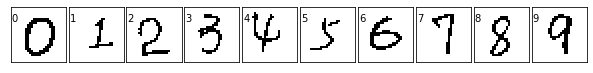

tensor([0, 1, 8, 3, 4, 5, 6, 7, 8, 9], device='mps:0')


In [25]:
plot_img(pic_tensor, pic_labels, len(pic_tensor))
print(torch.max(net(pic_tensor.to(dev)), dim=1).indices)


In [27]:
yao_path = 'mydata/yao/'

yao_number = []
for i in range(7):
    yao_number.append(pre_pic(yao_path + '{}.png'.format(i+1))[0])

len(yao_number[0])

FileNotFoundError: [Errno 2] No such file or directory: 'mydata/yao/1.png'

In [ ]:
yao_tensor = torch.tensor(np.array(yao_number))
yao_labels = np.array([5,2,0,1,3,1,4])

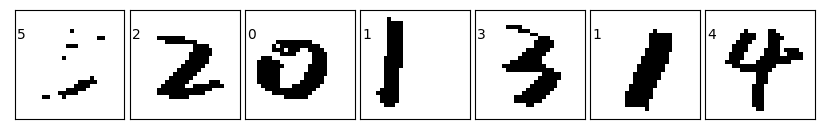

tensor([5, 2, 0, 0, 3, 3, 8], device='mps:0')


In [ ]:
plot_img(yao_tensor, yao_labels, len(yao_tensor))
print(torch.max(net(yao_tensor.to(dev)), dim=1).indices)
